In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('full_df.csv')

In [3]:
df[df['filename'] == '0_right.jpg']

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg


In [4]:
# This is to show that the dataset separate two image files in two rows
df[df['Left-Fundus'] == '4_left.jpg']

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
3197,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",4_left.jpg


In [5]:
# check the string slicing 
x = df['filename']
name = x[0][:-4]
name[-4]

'i'

In [6]:
# test imputing the image
# y = df['filename'][0]
# im = Image.open(f'./0_right_thumbnail.jpg')
# list(im.getdata())

In [7]:
# with open(f'./preprocessed_images/{x}', 'r') as f:
#     print(f)

# The following grabs all the images from the preprocessed_images folder, and create thumbnail to reduce the data size 
from PIL import Image
from tensorflow.keras.preprocessing import image

# create three lists(all, left, right) for the model later
all_images = []
all_images_left = []
all_images_right = []
def get_pixels(values):
    im = Image.open(f'./preprocessed_images/{values}')
    name = values[:-4]
    im.thumbnail((128,128))
    all_images.append(im)
    if name[-5] == 'r':
        all_images_right.append(im)
    else:
        all_images_left.append(im)
    return im

df['pixel_data'] = df['filename'].apply(lambda x: get_pixels(x))

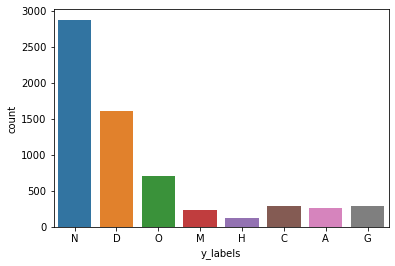

In [10]:
# countplot to show the distribution of the dataset
import seaborn as sns
sns.countplot(df['y_labels'])

In [11]:
df['target'].value_counts()

[1, 0, 0, 0, 0, 0, 0, 0]    2873
[0, 1, 0, 0, 0, 0, 0, 0]    1608
[0, 0, 0, 0, 0, 0, 0, 1]     708
[0, 0, 0, 1, 0, 0, 0, 0]     293
[0, 0, 1, 0, 0, 0, 0, 0]     284
[0, 0, 0, 0, 1, 0, 0, 0]     266
[0, 0, 0, 0, 0, 0, 1, 0]     232
[0, 0, 0, 0, 0, 1, 0, 0]     128
Name: target, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [8]:
df = df.drop('filepath', axis=1)

In [58]:
def combine_list(data):
    output_list = []
    output_list.append(data['N'])
    output_list.append(data['D'])
    output_list.append(data['G'])
    output_list.append(data['C'])
    output_list.append(data['A'])
    output_list.append(data['H'])
    output_list.append(data['M'])
    output_list.append(data['O'])
    return output_list

df['combined_labels'] = df.apply(lambda x: combine_list(x), axis=1)
df.head(1)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,M,O,labels,target,filename,pixel_data,y_labels,bin_labels,c_labels,combined_labels
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,N,0,0,"[0, 0, 0, 1, 0, 0, 0, 0]"


In [66]:
df.iloc[:3194]['combined_labels'].value_counts()

[1, 0, 0, 0, 0, 0, 0, 0]    1051
[0, 1, 0, 0, 0, 0, 0, 0]     687
[0, 0, 0, 0, 0, 0, 0, 1]     440
[0, 1, 0, 0, 0, 0, 0, 1]     233
[0, 0, 0, 1, 0, 0, 0, 0]     139
[0, 0, 0, 0, 1, 0, 0, 0]     117
[0, 0, 1, 0, 0, 0, 0, 0]     117
[0, 0, 0, 0, 0, 0, 1, 0]     103
[0, 1, 0, 0, 0, 1, 0, 0]      44
[0, 0, 0, 0, 0, 1, 0, 0]      36
[0, 1, 0, 1, 0, 0, 0, 0]      31
[0, 0, 1, 0, 0, 0, 0, 1]      30
[0, 0, 0, 0, 0, 0, 1, 1]      27
[0, 0, 0, 1, 0, 0, 0, 1]      21
[0, 1, 1, 0, 0, 0, 0, 0]      20
[0, 1, 0, 0, 0, 0, 1, 0]      14
[0, 1, 0, 0, 1, 0, 0, 0]      14
[0, 0, 0, 0, 1, 0, 0, 1]      12
[0, 0, 1, 0, 1, 0, 0, 0]      10
[0, 0, 0, 0, 0, 1, 0, 1]       8
[0, 1, 0, 1, 0, 0, 0, 1]       6
[0, 0, 1, 0, 0, 1, 0, 0]       5
[0, 0, 1, 0, 0, 0, 1, 0]       5
[0, 1, 1, 0, 0, 0, 0, 1]       5
[0, 0, 0, 0, 1, 1, 0, 0]       4
[0, 0, 1, 0, 0, 1, 0, 1]       3
[0, 1, 0, 0, 0, 0, 1, 1]       3
[0, 0, 0, 1, 0, 1, 0, 0]       2
[0, 0, 1, 1, 0, 0, 0, 0]       2
[0, 1, 0, 0, 1, 0, 0, 1]       1
[0, 1, 0, 

In [64]:
# create two y labeling methods for different models later on
def y_labels(label):
    return label[2]

def simplify(label):
    if label[2] == 'N':
        return 0
    else:
        return 1

def only_c(label):
    if label[2] == 'C':
        return 1
    else:
        return 0

def n_d(label):
    if label[2] == 'D':
        return 1
    elif label[2] == 'N':
        return 0
    else:
        return 2
    
df['y_labels'] = df['labels'].apply(lambda x: y_labels(x))
df['bin_labels'] = df['labels'].apply(lambda x: simplify(x))
df['c_labels'] = df['labels'].apply(lambda x: only_c(x))
df['nd_labels'] = df['labels'].apply(lambda x: n_d(x))
df.head(1)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,O,labels,target,filename,pixel_data,y_labels,bin_labels,c_labels,combined_labels,nd_labels
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,N,0,0,"[0, 0, 0, 1, 0, 0, 0, 0]",0


In [65]:
# df['c_labels'].value_counts()
df['nd_labels'].value_counts()

0    2873
2    1911
1    1608
Name: nd_labels, dtype: int64

In [14]:
# check if the data is balanced enough, seems ok in this case
df['bin_labels'].value_counts()

1    3519
0    2873
Name: bin_labels, dtype: int64

In [15]:
# change the image data into array 
for img in range(len(all_images)):
    all_images[img] = image.img_to_array(all_images[img])
    all_images[img] = all_images[img]/255
image_array = np.array(all_images)

In [16]:
image_array.shape

(6392, 128, 128, 3)

In [17]:
for img in range(len(all_images_left)):
    all_images_left[img] = image.img_to_array(all_images_left[img])
for img in range(len(all_images_right)):
    all_images_right[img] = image.img_to_array(all_images_right[img])

In [18]:
image_array_l = np.array(all_images_left)
image_array_r = np.array(all_images_right)

In [19]:
image_array.shape

(6392, 128, 128, 3)

In [20]:
# find the index number where the left eye image starts
y = df['y_labels'][3194:]
len(y)

3198

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from skimage import io

# x_train = np.array(all_images)
# X_unprocessed = df['pixel_data']
# transformer = ImageDataGenerator(rescale=3.0/255.)
# X = transformer.flow_from_dataframe(df, x_col=X_unprocessed, batch_size=20, target_size=(128,128))
# print(X.shape)
# print(X[0])

y = df['y_labels']

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.to_categorical(encoded_y)

binary_y = df['bin_labels']
binary_y = utils.to_categorical(binary_y)

c_y = df['c_labels']
c_y = utils.to_categorical(c_y)

nd_y = df['nd_labels']
nd_y = utils.to_categorical(nd_y)

X_train, X_test, y_train, y_test = train_test_split(image_array, nd_y, test_size=0.2)

In [68]:
dummy_y[0]

array([0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [69]:
print(X_train.shape)
print(y_train.shape)

(5113, 128, 128, 3)
(5113, 3)


## The first model
using softmax as the last activation function, num_classes should be changed when creating different models

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = 3

cnn = Sequential()
cnn.add(Conv2D(32,(3,3),
              activation='relu',
              input_shape=(128,128,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(32, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(16, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(num_classes, activation='softmax'))
cnn.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy', 'Precision', 'Recall'])

In [78]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

### The best accuracy for binary in this model is 55%, for multi-categories is around 46%

In [79]:
batch_size=20
epochs=15

img_rows, img_cols = 28,28


cnn.fit(X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_split=0.2,
       callbacks=[early_stop])

Epoch 1/15
205/205 [==============================] - 22s 109ms/step - loss: 1.0793 - accuracy: 0.4462 - precision: 0.3396 - recall: 0.0044 - val_loss: 1.0685 - val_accuracy: 0.4604 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
205/205 [==============================] - 22s 109ms/step - loss: 1.0748 - accuracy: 0.4455 - precision: 0.4000 - recall: 4.8900e-04 - val_loss: 1.0616 - val_accuracy: 0.4604 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
205/205 [==============================] - 22s 109ms/step - loss: 1.0712 - accuracy: 0.4455 - precision: 0.4691 - recall: 0.0093 - val_loss: 1.0623 - val_accuracy: 0.4604 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
205/205 [==============================] - 21s 103ms/step - loss: 1.0695 - accuracy: 0.4455 - precision: 0.4074 - recall: 0.0054 - val_loss: 1.0602 - val_accuracy: 0.4604 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
205/205 [==============================] - 21

In [35]:
y_predict = cnn.predict(X_test)

In [46]:
for i in y_predict:
    for j in range(len(i)):
        if i[j] == max(i):
            i[j] = 1
        else:
            i[j] = 0
count=0
for i in range(len(y_predict)):
    if np.where(y_predict[i] == 1) == 1:
        print('ya!')
    if np.where(y_predict[i] == 1) != np.where(y_test[i] == 1):
        count+=1
        print(i, y_predict[i], y_test[i])
print(count)
count/len(y_predict)

4 [1. 0.] [0. 1.]
41 [1. 0.] [0. 1.]
60 [1. 0.] [0. 1.]
70 [1. 0.] [0. 1.]
91 [1. 0.] [0. 1.]
98 [1. 0.] [0. 1.]
131 [1. 0.] [0. 1.]
132 [1. 0.] [0. 1.]
133 [1. 0.] [0. 1.]
140 [1. 0.] [0. 1.]
162 [1. 0.] [0. 1.]
178 [1. 0.] [0. 1.]
199 [1. 0.] [0. 1.]
224 [1. 0.] [0. 1.]
235 [1. 0.] [0. 1.]
262 [1. 0.] [0. 1.]
267 [1. 0.] [0. 1.]
288 [1. 0.] [0. 1.]
321 [1. 0.] [0. 1.]
330 [1. 0.] [0. 1.]
333 [1. 0.] [0. 1.]
337 [1. 0.] [0. 1.]
365 [1. 0.] [0. 1.]
388 [1. 0.] [0. 1.]
391 [1. 0.] [0. 1.]
416 [1. 0.] [0. 1.]
457 [1. 0.] [0. 1.]
497 [1. 0.] [0. 1.]
562 [1. 0.] [0. 1.]
713 [1. 0.] [0. 1.]
715 [1. 0.] [0. 1.]
722 [1. 0.] [0. 1.]
737 [1. 0.] [0. 1.]
765 [1. 0.] [0. 1.]
780 [1. 0.] [0. 1.]
801 [1. 0.] [0. 1.]
806 [1. 0.] [0. 1.]
813 [1. 0.] [0. 1.]
818 [1. 0.] [0. 1.]
850 [1. 0.] [0. 1.]
864 [1. 0.] [0. 1.]
890 [1. 0.] [0. 1.]
895 [1. 0.] [0. 1.]
909 [1. 0.] [0. 1.]
931 [1. 0.] [0. 1.]
957 [1. 0.] [0. 1.]
973 [1. 0.] [0. 1.]
1000 [1. 0.] [0. 1.]
1005 [1. 0.] [0. 1.]
1014 [1. 0.] [0. 1.]
1031

0.04755944931163955

In [73]:
score = cnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# print(6099/(293+6099))

Test loss: 1.0540205240249634
Test accuracy: 0.45817044377326965


## The second model
the very first model - using sigmoid as the last activation function, nodes are set to 8 currently

In [47]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.fit(X_train,y_train, epochs=10, batch_size=20)

Epoch 1/10
240/240 [==============================] - 25s 103ms/step - loss: 0.1999 - accuracy: 0.9547
Epoch 2/10
240/240 [==============================] - 26s 108ms/step - loss: 0.1778 - accuracy: 0.9547
Epoch 3/10
240/240 [==============================] - 26s 107ms/step - loss: 0.1717 - accuracy: 0.9547
Epoch 4/10
  7/240 [..............................] - ETA: 21s - loss: 0.1714 - accuracy: 0.9500

KeyboardInterrupt: 

## The third model
reference - https://www.kaggle.com/roobansappani/cataract-detection
saw this notebook and it got 93% of accuracy, so I decided to test on the binary case
the model takes a LONG time to fit(check the seconds), I only train for 10 epochs in the following model
### got an accuracy of 63%, could possibly get higher

In [49]:
from tensorflow.keras.applications import VGG19

vgg = VGG19(weights = "imagenet", include_top = False, input_shape=(128, 128, 3))
for layer in vgg.layers:
    layer.trainable = False

model_1 = Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(2,activation = "softmax"))
model_1.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy', 'Precision', 'Recall'])

In [50]:
model_1.fit(X_train, y_train, 
            validation_split = 0.2, 
            epochs = 4,
            batch_size = 128)

Epoch 1/4
30/30 [==============================] - 186s 6s/step - loss: 0.3046 - accuracy: 0.9259 - precision: 0.9259 - recall: 0.9259 - val_loss: 0.1507 - val_accuracy: 0.9552 - val_precision: 0.9552 - val_recall: 0.9552
Epoch 2/4
30/30 [==============================] - 179s 6s/step - loss: 0.1244 - accuracy: 0.9567 - precision: 0.9567 - recall: 0.9567 - val_loss: 0.1105 - val_accuracy: 0.9541 - val_precision: 0.9541 - val_recall: 0.9541
Epoch 3/4
30/30 [==============================] - 181s 6s/step - loss: 0.0995 - accuracy: 0.9606 - precision: 0.9606 - recall: 0.9606 - val_loss: 0.0957 - val_accuracy: 0.9593 - val_precision: 0.9593 - val_recall: 0.9593
Epoch 4/4
30/30 [==============================] - 179s 6s/step - loss: 0.0869 - accuracy: 0.9664 - precision: 0.9664 - recall: 0.9664 - val_loss: 0.0847 - val_accuracy: 0.9625 - val_precision: 0.9625 - val_recall: 0.9625


In [51]:
score = model_1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08584222197532654
Test accuracy: 0.969962477684021


In [11]:
df_excel = pd.read_excel('./ODIR-5K/ODIR-5K/data.xlsx', sheet_name='Sheet1')

In [98]:
df_excel

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
3496,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3497,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0
3498,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


In [92]:
allim = []
for i in range(len(df[df['labels'] != "['N']"]['filename'])):
    img = image.load_img('./preprocessed_images/'+df[df['labels'] != "['N']"]['filename'].iloc[i],target_size=(100,100))
    img = image.img_to_array(img)
    img = img/255
    allim.append(img)
image_array2 = np.array(allim)
image_array2.shape

(3519, 100, 100, 3)

In [91]:
df[df['labels'] != "['N']"]['filename'].iloc[0]

'2_right.jpg'

In [93]:
no_n_y = df[df['labels'] != "['N']"]['y_labels']
no_n_y

2       D
3       D
4       D
5       D
6       D
       ..
6387    D
6388    D
6389    D
6390    D
6391    H
Name: y_labels, Length: 3519, dtype: object

In [94]:
no_n_y = df[df['labels'] != "['N']"]['y_labels']
encoder2 = LabelEncoder()
encoder.fit(no_n_y)
encoded_no_n_y = encoder.transform(no_n_y)
dummy_no_n_y = utils.to_categorical(encoded_no_n_y)


X_train, X_test, y_train, y_test = train_test_split(image_array2, dummy_no_n_y, test_size=0.2)

In [97]:
df[df['labels'] != "['N']"]['y_labels'].value_counts()

D    1608
O     708
C     293
G     284
A     266
M     232
H     128
Name: y_labels, dtype: int64

In [95]:
dummy_y[0]

array([0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [96]:
print(X_train.shape)
print(y_train.shape)

(2815, 100, 100, 3)
(2815, 7)


In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = 7

cnn2 = Sequential()
cnn2.add(Conv2D(50,(3,3),
              activation='relu',
              input_shape=(100,100,3)))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Conv2D(25,(3,3),activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Conv2D(16,(3,3),activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Flatten())
cnn2.add(Dense(128, activation='relu'))
cnn2.add(Dropout(0.3))
cnn2.add(Dense(64, activation='relu'))
cnn2.add(Dropout(0.3))
cnn2.add(Dense(num_classes, activation='softmax'))
cnn2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy', 'Precision', 'Recall'])

In [102]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [103]:
batch_size=20
epochs=15

img_rows, img_cols = 28,28


cnn2.fit(X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_split=0.2,
       callbacks=[early_stop])

Epoch 1/15
113/113 [==============================] - 12s 102ms/step - loss: 1.6902 - accuracy: 0.4405 - precision: 0.4875 - recall: 0.0782 - val_loss: 1.5647 - val_accuracy: 0.4938 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
113/113 [==============================] - 11s 99ms/step - loss: 1.6253 - accuracy: 0.4525 - precision: 0.4667 - recall: 0.1026 - val_loss: 1.5451 - val_accuracy: 0.4938 - val_precision: 0.3500 - val_recall: 0.0124
Epoch 3/15
113/113 [==============================] - 11s 99ms/step - loss: 1.6150 - accuracy: 0.4503 - precision: 0.5214 - recall: 0.1137 - val_loss: 1.5318 - val_accuracy: 0.4938 - val_precision: 0.5106 - val_recall: 0.0426
Epoch 4/15
113/113 [==============================] - 11s 101ms/step - loss: 1.6118 - accuracy: 0.4525 - precision: 0.4627 - recall: 0.0937 - val_loss: 1.5447 - val_accuracy: 0.4938 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
113/113 [==============================] - 12s 102ms/step - loss: 1

In [105]:
y_predict = cnn2.predict(X_test)
for i in y_predict:
    for j in range(len(i)):
        if i[j] == max(i):
            i[j] = 1
        else:
            i[j] = 0
count=0
for i in range(len(y_predict)):
    if np.where(y_predict[i] == 1) == np.where(y_test[i] == 1):
        count+=1
count/len(y_predict)

0.43892045454545453

In [106]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.555878758430481
Test accuracy: 0.4389204680919647


In [107]:
from tensorflow.keras.applications import VGG19

vgg = VGG19(weights = "imagenet", include_top = False, input_shape=(100, 100, 3))
for layer in vgg.layers:
    layer.trainable = False

model_1 = Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(7,activation = "softmax"))
model_1.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
model_1.fit(X_train, y_train, 
            validation_split = 0.2, 
            epochs = 4,
            batch_size = 64)

In [ ]:
score = model_1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])